In [63]:
#  建立自己的冰川边界并将属性添加
# #aru50  RGI60-13.51476  aru53 RGI60-13.51473
print('test')

test


In [64]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import oggm
import os
from oggm import cfg, utils, workflow, tasks, graphics
from oggm.core import inversion
from oggm import cfg
from oggm import tasks, utils, workflow, graphics, DEFAULT_BASE_URL
import salem
import xarray as xr
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
cfg.initialize(logging_level='WARNING')
cfg.PARAMS['use_multiprocessing'] = True
cfg.PARAMS['mp_processes'] = 12




2025-10-11 20:15:29: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-11 20:15:29: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-11 20:15:29: oggm.cfg: Multiprocessing: using all available processors (N=24)
2025-10-11 20:15:29: oggm.cfg: Multiprocessing switched ON after user settings.
2025-10-11 20:15:29: oggm.cfg: Multiprocessing: using the requested number of processors (N=12)


In [65]:
utils.get_rgi_dir(version='60')
# utils.get_rgi_dir(version='60')

'/home/slw/OGGM/rgi/RGIV60'

In [66]:
sh = utils.get_rgi_region_file('13', version='60')
sh

'/home/slw/OGGM/rgi/RGIV60/13_rgi60_CentralAsia/13_rgi60_CentralAsia.shp'

In [67]:
gdf = gpd.read_file(sh)
gdf.head()

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-13.00001,G079494E34471N,20000810,-9999999,79.4939,34.4713,13,5,0.432,5678,...,312,683,0,0,0,0,9,9,None,"POLYGON ((79.49945 34.47555, 79.4988 34.47498,..."
1,RGI60-13.00002,G077951E35545N,20020802,-9999999,77.9513,35.5452,13,5,0.367,5889,...,195,1307,0,0,0,0,9,9,None,"POLYGON ((77.95519 35.55007, 77.95517 35.54953..."
2,RGI60-13.00003,G077930E35519N,20020802,-9999999,77.9295,35.5188,13,5,0.070,5646,...,318,426,0,0,0,0,9,9,None,"POLYGON ((77.92863 35.52057, 77.92864 35.5203,..."
3,RGI60-13.00004,G077924E35525N,20020802,-9999999,77.9237,35.5252,13,5,0.255,5698,...,39,605,0,0,0,0,9,9,None,"POLYGON ((77.91713 35.5272, 77.91764 35.52719,..."
4,RGI60-13.00005,G077914E35531N,20020802,-9999999,77.9141,35.5309,13,5,0.261,5644,...,8,389,0,0,0,0,9,9,None,"POLYGON ((77.91939 35.5298, 77.91938 35.52958,..."


2025-10-11 20:15:40: oggm.cfg: PARAMS['border'] changed from `80` to `10`.


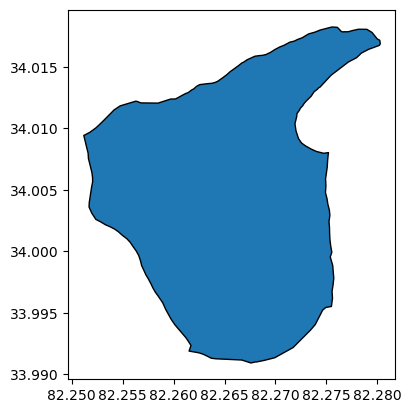

In [68]:
# OGGM set-up
cfg.PATHS['working_dir'] = '/mnt/d/lidar/ali/area/same_boundary'
cfg.PARAMS['border'] = 10

# aru 50 
# Get the HEF geometry and plot it
gl = utils.get_rgi_glacier_entities(['RGI60-13.51476'])
gl.plot(edgecolor='k');

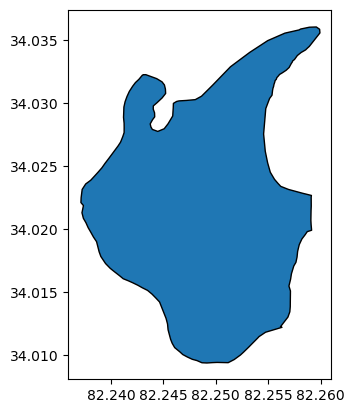

In [69]:
# OGGM set-up
cfg.PATHS['working_dir'] = '/mnt/d/lidar/ali/area/same_boundary'
cfg.PARAMS['border'] = 10

#aru 53 
#Get the HEF geometry and plot it
gl = utils.get_rgi_glacier_entities(['RGI60-13.51473'])
gl.plot(edgecolor='k');

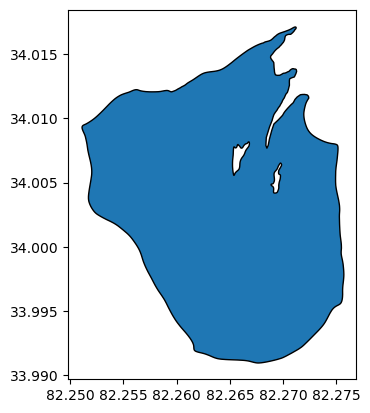

In [70]:
#Aru 50   We simulate the case where we only have the geometry, nothing else
divides = gpd.read_file('/mnt/d/lidar/ali/lco8/clip/sentinel_ndmi/glaicer_bu/smooth_aru50_body/NDSI_20170815_aru50_smooth.shp')#'/mnt/d/lidar/ali/area/aru_smooth/20250507_aru53.shp')
rgidf_simple = utils.cook_rgidf(divides, o1_region='13')
rgidf_simple['RGIId']=["RGI60-13.51476"]
gdirs = rgidf_simple.loc[rgidf_simple.RGIId == 'RGI60-13.51476'][['geometry']]
gdirs.plot(edgecolor='k');

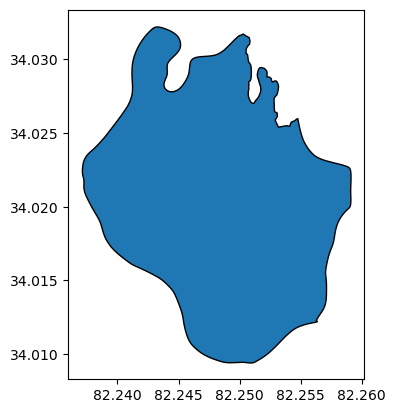

In [49]:
#aru 53  We simulate the case where we only have the geometry, nothing else
divides = gpd.read_file('/mnt/d/lidar/ali/lco8/clip/sentinel_ndmi/glaicer_bu/smooth_aru53_body/NDSI_20170815_aru53_smooth.shp')#'/mnt/d/lidar/ali/area/aru_smooth/20250507_aru53.shp')
rgidf_simple = utils.cook_rgidf(divides, o1_region='13')
rgidf_simple['RGIId']=["RGI60-13.51473"]
gdirs = rgidf_simple.loc[rgidf_simple.RGIId == 'RGI60-13.51473'][['geometry']]
gdirs.plot(edgecolor='k');

In [71]:
template = pd.concat([gl]*1, ignore_index=True)
template

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-13.51473,G082249E34023N,20100928,-9999999,82.249,34.023,13,8,3.547,5268,...,31,3559,0,0,1,0,9,9,CN5Z412C0011,"POLYGON ((82.24296 34.03227, 82.24326 34.03227..."


In [72]:
# aru 50 
# Attributes
template['RGIId'] = ['RGI60-13.51476_2']
template['Name'] = ['aru50_af']
# Geometries
template['geometry'] = rgidf_simple['geometry'].values
# Center point
for i, geom in template[['geometry']].iterrows():
    cenlon, cenlat = geom.geometry.centroid.xy
    template.loc[i, 'CenLon'] = np.array(cenlon)
    template.loc[i, 'CenLat'] = np.array(cenlat)
# This is important to properly georeference the file
import salem
template.crs = salem.wgs84.srs

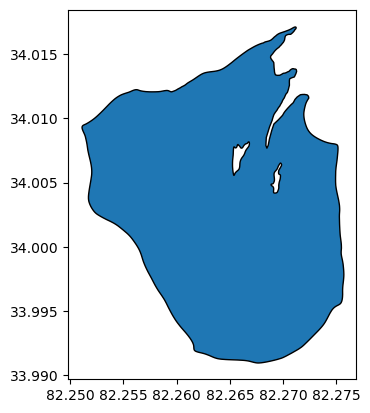

In [73]:
template.plot(edgecolor='k');

In [74]:
## 阿汝 50
#################
hef_new_shape_path = os.path.join(cfg.PATHS['working_dir'], 'aru50_af_2017.shp')
template.to_file(hef_new_shape_path)
hef_new_shape_path

'/mnt/d/lidar/ali/area/same_boundary/aru50_af_2017.shp'

In [58]:
# aru 53
# Attributes
template['RGIId'] = ['RGI60-13.51473_2']
template['Name'] = ['aru53_af']
# Geometries
template['geometry'] = rgidf_simple['geometry'].values
# Center point
for i, geom in template[['geometry']].iterrows():
    cenlon, cenlat = geom.geometry.centroid.xy
    template.loc[i, 'CenLon'] = np.array(cenlon)
    template.loc[i, 'CenLat'] = np.array(cenlat)
# This is important to properly georeference the file
import salem
template.crs = salem.wgs84.srs

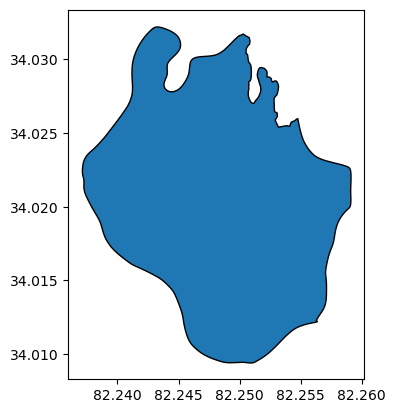

In [62]:
template.plot(edgecolor='k');

In [61]:
## 阿汝 53
#################
hef_new_shape_path = os.path.join(cfg.PATHS['working_dir'], 'aru53_af_2017.shp')
template.to_file(hef_new_shape_path)
hef_new_shape_path

'/mnt/d/lidar/ali/area/same_boundary/aru53_af_2017.shp'

In [30]:
# This is important! We tell OGGM to recompute the glacier area for us
cfg.PARAMS['use_rgi_area'] = False
# Intersects dont work for now
cfg.PARAMS['use_intersects'] = False

# This is important for centerlines - if you have them
# cfg.set_intersects_db(hef_intersects_path)

# This is to avoid a download in the tutorial, you dont' need do this at home
# cfg.PATHS['dem_file'] = utils.get_demo_file('hef_srtm.tif')

# This is important again - standard OGGM 
rgidf = gpd.read_file(hef_new_shape_path)
gdirs = workflow.init_glacier_directories(rgidf, reset=True, force=True)

2025-10-06 11:28:19: oggm.cfg: PARAMS['use_rgi_area'] changed from `True` to `False`.
2025-10-06 11:28:19: oggm.cfg: PARAMS['use_intersects'] changed from `True` to `False`.
2025-10-06 11:28:19: oggm.workflow: Execute entity tasks [GlacierDirectory] on 1 glaciers


In [14]:
workflow.execute_entity_task(tasks.define_glacier_region, gdirs);
workflow.execute_entity_task(tasks.glacier_masks, gdirs);
workflow.execute_entity_task(tasks.compute_centerlines, gdirs);
workflow.execute_entity_task(tasks.initialize_flowlines, gdirs);
workflow.execute_entity_task(tasks.catchment_area, gdirs);
workflow.execute_entity_task(tasks.catchment_width_geom, gdirs);
workflow.execute_entity_task(tasks.catchment_width_correction, gdirs);

2025-10-06 11:18:17: oggm.workflow: Execute entity tasks [define_glacier_region] on 1 glaciers
2025-10-06 11:18:18: oggm.workflow: Execute entity tasks [glacier_masks] on 1 glaciers
2025-10-06 11:18:19: oggm.workflow: Execute entity tasks [compute_centerlines] on 1 glaciers
2025-10-06 11:18:19: oggm.workflow: Execute entity tasks [initialize_flowlines] on 1 glaciers
2025-10-06 11:18:19: oggm.workflow: Execute entity tasks [catchment_area] on 1 glaciers
2025-10-06 11:18:19: oggm.workflow: Execute entity tasks [catchment_width_geom] on 1 glaciers
2025-10-06 11:18:19: oggm.workflow: Execute entity tasks [catchment_width_correction] on 1 glaciers


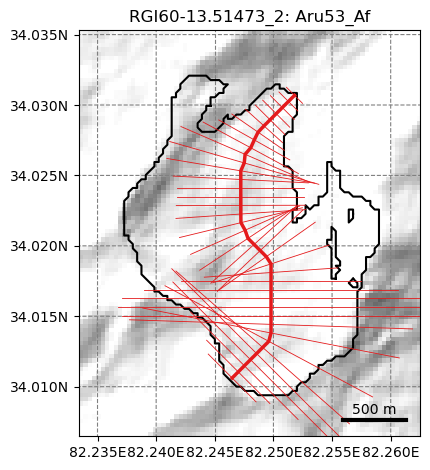

In [ ]:
#画出主流线
graphics.plot_catchment_width(gdirs, add_intersects=True, corrected=True)
# graphics.plot_googlemap(gdirs, figsize=(6, 6));